# Data Analyst Associate Practical Exam Submission

**You can use any tool that you want to do your analysis and create visualizations. Use this template to write up your summary for submission.**

You can use any markdown formatting you wish. If you are not familiar with Markdown, read the [Markdown Guide](https://s3.amazonaws.com/talent-assets.datacamp.com/Markdown+Guide.pdf) before you start.



## Task 1



The dataset consists of 2000 rows and 8 columns.

a.  The time_to_close(int64,discrete), location(object), individuals_on_claim(int64, discrete),         cause(object, nominal) columns all match the table description and also have no missing values


-  The claim_id does not match the description. It has no missing value but it is of the           
   numerical(integer, int64) data type though described as Nominal.


-  The claim_amount has an Object datatype (string) instead of a continuous datatype (float64) as       specified. The values all appear in two decimal places.

-   The linked_cases match the data type (nominal) but have missing values likewise the amount_paid         which matches the datatype(continuous) but has missing values.

---

b. There are a total of 62 missing values. 36 missing values in the amount_paid column and 26           missing values in the linked_cases column. The other columns have no missing value.

---

c. To ensure that the values in the dataset match the descriptions, certain actions were taken:

-   The values of the `claim_id` were converted from integer(int64) to a string(object)

-   Regularising the inconsistent casing in the `cause` column to lowercase and replacing instances     of vegetables with vegetable.

-   The `claim_amount` column was also converted from a string datatype to a continuous datatype       and the currency symbol (R$) was removed to regularise the values.

-   Additionally, missing values in the `amount_paid` column were replaced with the median amount       paid, while missing values in the `linked_cases` column were replaced with the value False.

In [177]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('food_claims_2212.csv')
#View the data
df.head()

,claim_id,time_to_close,claim_amount,amount_paid,location,individuals_on_claim,linked_cases,cause
0,1,317,R$ 74474.55,51231.37,RECIFE,15,False,unknown
1,2,195,R$ 52137.83,42111.30,FORTALEZA,12,True,unknown
2,3,183,R$ 24447.2,23986.30,SAO LUIS,10,True,meat
3,4,186,R$ 29006.28,27942.72,FORTALEZA,11,False,meat
4,5,138,R$ 19520.6,16251.06,RECIFE,11,False,vegetable


In [178]:
#check the data information - columns and the datatypes, null(missing) values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   claim_id              2000 non-null   int64  
 1   time_to_close         2000 non-null   int64  
 2   claim_amount          2000 non-null   object 
 3   amount_paid           1964 non-null   float64
 4   location              2000 non-null   object 
 5   individuals_on_claim  2000 non-null   int64  
 6   linked_cases          1974 non-null   object 
 7   cause                 2000 non-null   object 
dtypes: float64(1), int64(3), object(4)
memory usage: 125.1+ KB


In [179]:
#check the shape of the data
df.shape

(2000, 8)

In [180]:
#check the number of null(missing) values
df.isnull().sum()

claim_id                 0
time_to_close            0
claim_amount             0
amount_paid             36
location                 0
individuals_on_claim     0
linked_cases            26
cause                    0
dtype: int64

###Regularising the Columns and Handling missing values

In [181]:
#convert claim_id from integer to nominal

df['claim_id'] = df['claim_id'].apply(lambda x: str(x))
df['claim_id'].dtype

dtype('O')

In [182]:
# strip the currency symbol from the column
df['claim_amount'] = df['claim_amount'].str.replace('R$', '', regex = False)

# convert the claim amount column  to float
df['claim_amount'] = df['claim_amount'].astype(float)


df['claim_amount'].dtype

dtype('float64')

In [183]:
#Replacing missing values in the amount paid column with the median values
median_amount_pd = df['amount_paid'].median()
df['amount_paid'] = df['amount_paid'].fillna(median_amount_pd)

In [184]:
#Replacing missing values in linked cases column
df['linked_cases'] = df['linked_cases'].fillna(False)
df['linked_cases'].isnull().sum()


0

In [185]:
#inspecting the data for null values and confirming that datatypes are consistent with the  description in the table
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   claim_id              2000 non-null   object 
 1   time_to_close         2000 non-null   int64  
 2   claim_amount          2000 non-null   float64
 3   amount_paid           2000 non-null   float64
 4   location              2000 non-null   object 
 5   individuals_on_claim  2000 non-null   int64  
 6   linked_cases          2000 non-null   bool   
 7   cause                 2000 non-null   object 
dtypes: bool(1), float64(2), int64(2), object(3)
memory usage: 111.5+ KB


In [186]:
#make the strings uniform in the cause column
df['cause'] = df['cause'].str.lower()

#Replace vegetables with vegetable in the cause column
df['cause'] = df['cause'].str.replace('vegetables', 'vegetable')
df['cause']

0         unknown
1         unknown
2            meat
3            meat
4       vegetable
          ...    
1995         meat
1996         meat
1997         meat
1998         meat
1999    vegetable
Name: cause, Length: 2000, dtype: object

## Task 2

The plot shows RECIFE has the the highest number of claims per location with 885 claims. Regarding balance, the distribution of observations is uneven among the categories of the location variable. RECIFE has approximately three times as many claims as FORTALEZA and almost twice as many as SAO LUIS. The lowest number of claims belongs to NATAL. Consequently, the data is imbalanced across the location categories.

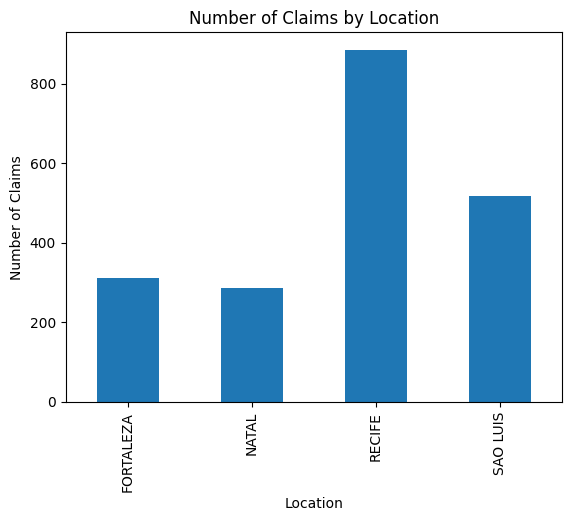

In [187]:
# create a grouped DataFrame by location
group_by_location = df.groupby('location')['claim_id'].count()

#Bar plot
group_by_location.plot(kind='bar')
plt.title('Number of Claims by Location')
plt.xlabel('Location')
plt.ylabel('Number of Claims')

# show the plot
plt.show()

In [188]:
df['location'].value_counts()

RECIFE       885
SAO LUIS     517
FORTALEZA    311
NATAL        287
Name: location, dtype: int64

## Task 3

The Time to Close Claim column contains 2000 observations. The mean time taken to close a claim is approximately 186 days, with a standard deviation of 49 days. The minimum time taken to close a claim was 76 days, and the maximum time was 518 days. The interquartile range (IQR) is 46 days, with 25% of the claims taking less than 158 days, 50% taking less than 179 days, and 75% taking less than 204 days.

count    2000.00000
mean      185.56800
std        49.16339
min        76.00000
25%       158.00000
50%       179.00000
75%       204.00000
max       518.00000
Name: time_to_close, dtype: float64

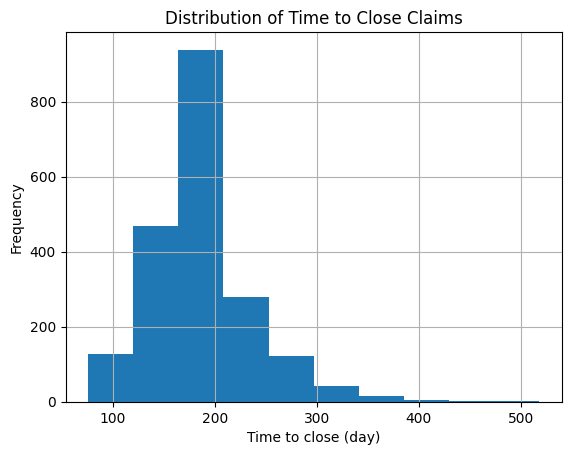

In [189]:
#Distribution of the time to close column
df['time_to_close'].hist(bins=10)
plt.title('Distribution of Time to Close Claims')
plt.xlabel('Time to close (day)')
plt.ylabel('Frequency')

#summary statistic of the time to close column
df['time_to_close'].describe()

## Task 4

- The Histogram distribution of time to close per location and a scatter plot of location and time to close is shown

- The boxplot shows that SAO LUIS has the highest outliers showing the longest time it took to resolve a claim

-  The Heatmap FORTRALEZA has the highest average turn around time to close claims and the other locations have similar averages of time to close claims.

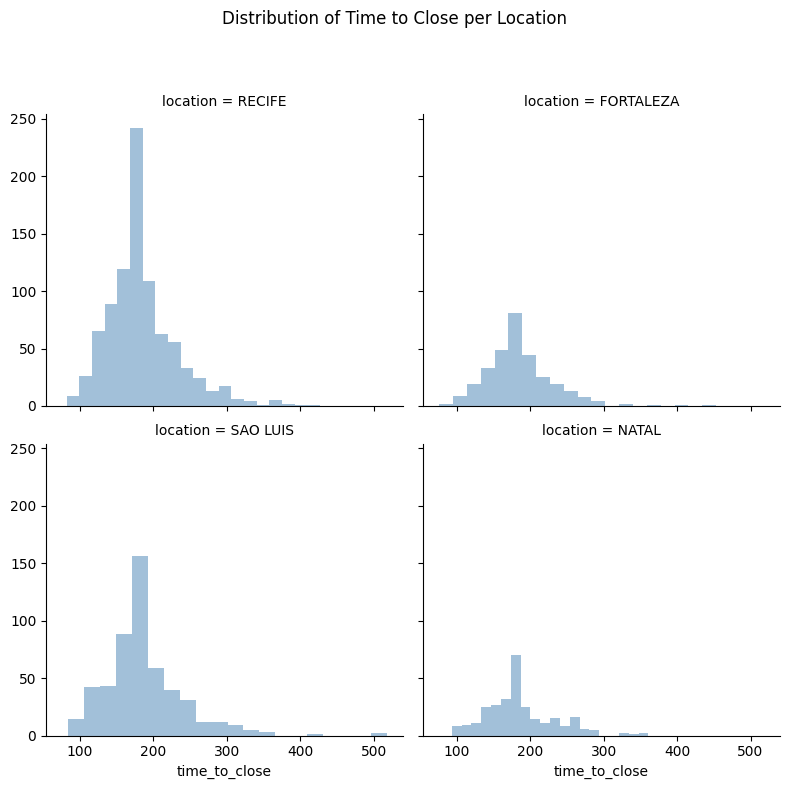

In [190]:
# Relationship between Time to close and location
time_to_close_grid = sns.FacetGrid(df, col='location', col_wrap=2, height=4)
time_to_close_grid.map(plt.hist, 'time_to_close', color='steelblue', alpha=.5, bins=20)
plt.subplots_adjust(top=0.85)
time_to_close_grid.fig.suptitle('Distribution of Time to Close per Location')
plt.show()

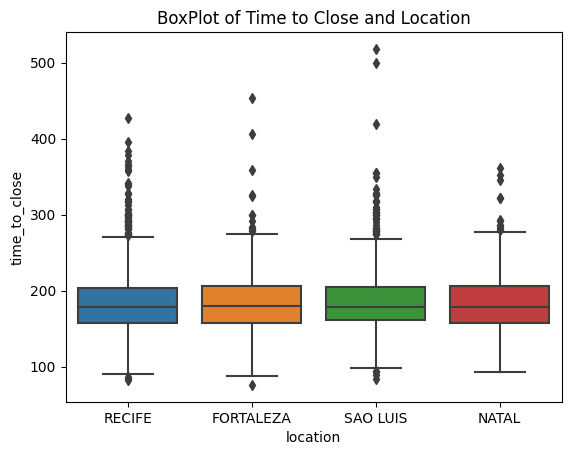

In [191]:
#create a boxplot relationship
sns.boxplot(x='location', y='time_to_close', data=df)
plt.title('BoxPlot of Time to Close and Location')
plt.show()
## SAO LUIS has the highest outliers showing the longest time it took to resolve a claim

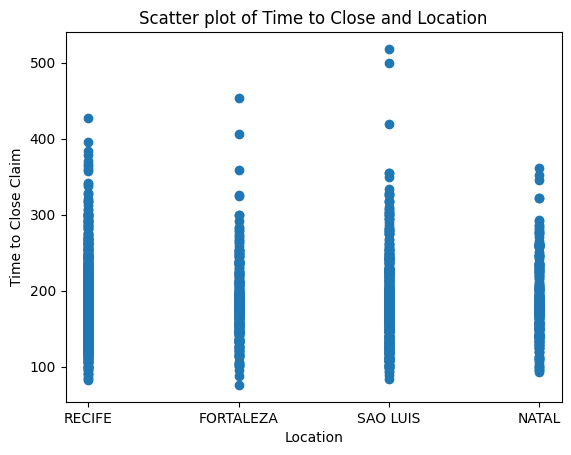

In [192]:
#Scatter Plot Relationship
plt.scatter(df['location'], df['time_to_close'])
plt.xlabel('Location')
plt.ylabel('Time to Close Claim')
plt.title('Scatter plot of Time to Close and Location')
plt.show()

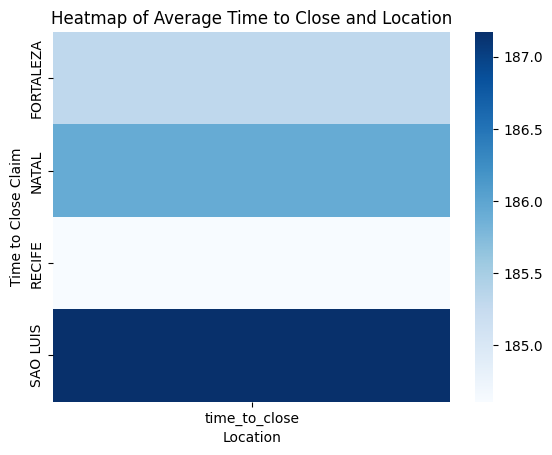

In [193]:
#Heatmap of average time to close and location
pivot = df.pivot_table(values='time_to_close', index='location', aggfunc='mean')

sns.heatmap(pivot, cmap='Blues')
plt.xlabel('Location')
plt.ylabel('Time to Close Claim')
plt.title('Heatmap of Average Time to Close and Location')
plt.show()

## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam